In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %reload_ext autoreload

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import skimage.io as io
import itertools
import filters
import homography
import rectification
import utils
import detector, descriptor, matching
import constants

# Input Images

In [4]:
name = "doll"

In [5]:
im1 = utils.read_img("data/" + name + "1.jpg", gray=True)
im1.shape

(750, 1000)

In [6]:
im2 = utils.read_img("data/" + name + "2.jpg", gray=True)
im2.shape

(750, 1000)

In [52]:
import math
h, w = im1.shape
constants.MAX_RADIUS = math.sqrt(h * w)
constants.MAX_RADIUS

866.0254037844386

# Detect Corners

In [7]:
strength1, coords1 = detector.get_harris(im1)
strength2, coords2 = detector.get_harris(im2)
print(f"Detected {len(coords1)} points from image 1.")
print(f"Detected {len(coords2)} points from image 2.")

Detected 2087 points from image 1.
Detected 314 points from image 2.


In [46]:
strength1[coords1[0][0], coords1[0][1]]

0.00022927060571401479

In [22]:
coords1[0]

array([566, 266])

In [49]:
sorted(coords1, key=lambda i : strength1[i[1], i[0]])[:20]

[array([344, 303]),
 array([ 80, 255]),
 array([343, 329]),
 array([849, 467]),
 array([188, 121]),
 array([547, 396]),
 array([811, 424]),
 array([216, 274]),
 array([691, 364]),
 array([438, 426]),
 array([167, 431]),
 array([567, 121]),
 array([380, 506]),
 array([603, 371]),
 array([349, 201]),
 array([163, 434]),
 array([385, 590]),
 array([858, 302]),
 array([ 65, 291]),
 array([950, 424])]

In [ ]:
# corners2 = detector.anms_2(strength2, coords2)
# print(f"Selected top {constants.NUM_KEEP} points from image 2.")

In [52]:
len(np.unique(corners1))

52

In [54]:
for i in range(10):
    print("a", i)
    for j in range(10):
        if True:
            break
        print("b", j)

a 0
a 1
a 2
a 3
a 4
a 5
a 6
a 7
a 8
a 9


In [8]:
constants.NUM_KEEP = min([constants.NUM_KEEP, len(coords1), len(coords2)])
constants.NUM_KEEP

314

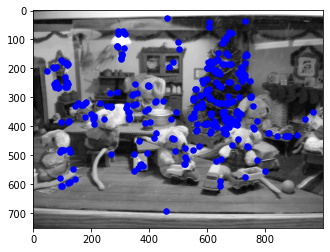

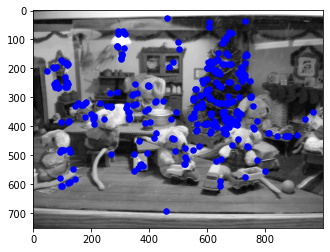

In [9]:
# utils.plot_points(im1, coords1)
utils.plot_points(im2, coords2)

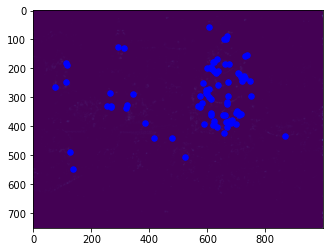

In [28]:
fig = utils.plot_points(im2, coords2)
plt.imshow(strength2)

# ANMS

In [69]:
corners1 = detector.anms(strength1, coords1)
print(f"Selected top {len(corners1)} points from image 1.")

indices = [274]
all_candidatecs:  2086 2086
selected and removed 274
indices = [273]
all_candidatecs:  2085 2086
selected and removed 273
indices = [272, 619]
all_candidatecs:  2084 2086
selected and removed 272
selected and removed 619
indices = [271, 536, 617]
all_candidatecs:  2082 2086
selected and removed 271
selected and removed 536
selected and removed 617
indices = [270, 534, 614, 618]
all_candidatecs:  2079 2086
selected and removed 270
selected and removed 534
selected and removed 614
selected and removed 618
indices = [269, 532, 610, 614]
all_candidatecs:  2075 2086
selected and removed 269
selected and removed 532
selected and removed 610


ValueError: list.remove(x): x not in list

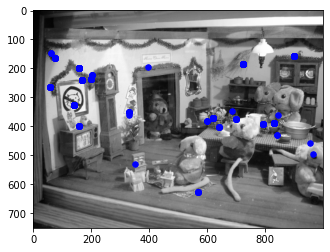

In [48]:
fig = utils.plot_points(im1, corners1)
# fig = utils.plot_points(im2, corners2)

# CORNER DESCRIPTION

In [16]:
patches1 = descriptor.get_patches(im1, corners1)
vectors1 = np.stack([p.flatten() for p in patches1])
print(f"Computed descriptors of image 1.")

Computed descriptors of image 1.


In [17]:
patches2 = descriptor.get_patches(im2, corners2)
vectors2 = np.stack([p.flatten() for p in patches2])
print(f"Computed descriptors of image 2.")

Computed descriptors of image 2.


# CORNER MATCHING

In [23]:
matched1, matched2 = matching.match_features(corners1, vectors1, corners2, vectors2)
print(f"Found {len(matched1)}-{len(matched2)} candidate coorespondences.")

Found 2-2 candidate coorespondences.


In [25]:
if len(matched1) < 4:
    print(f"Cannot stitch images.")

Cannot stitch images.


In [26]:
result1, result2 = matching.ransac(matched1, matched2)

AssertionError: (0,)

In [ ]:
h2, corners2 = detector.get_corners(im2)
len(corners2)

In [ ]:
utils.plot_corners(im2, np.array([c.coord for c in corners2]))

# Do Adaptive Non-Maximal Suppression

In [ ]:
tmp = anms(corners1)

# Match Features

In [42]:
patches1 = get_patches(im1, corners1)
patches2 = get_patches(im2, corners2)

In [88]:
features1 = [Feature(c, p) for c, p in zip(corners1, patches1)]
features2 = [Feature(c, p) for c, p in zip(corners2, patches2)]

In [98]:
combos = np.array(list(itertools.product(features1, features2)))
combos.shape

(917715, 2)

In [99]:
dist2(patches1, patches2)

ValueError: too many values to unpack (expected 2)

In [100]:
patches1.shape

(951, 8, 8)

In [108]:
c1 = corners1
c2 = corners2
ndata, dimx = c1.shape #num_points1, dim1
ncenters, dimc = c2.shape #num_points2, dim2

In [109]:
np.ones((ncenters, 1)).shape

(965, 1)

In [107]:
np.sum((x ** 2).T, axis=0).shape

(951,)

In [111]:
a = (np.ones((ncenters, 1)) * np.sum((x ** 2).T, axis=0)).T
a.shape

(951, 965)

In [114]:
b = np.ones((ndata, 1)) * np.sum((c ** 2).T, axis=0)
b.shape

(951, 965)

In [9]:
a = np.array([1,2,3,4,1,2,3,4,1,2,3,4])
a = np.reshape(a, (3, 4))
a

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [11]:
a[:, ::3]

array([[1, 4],
       [1, 4],
       [1, 4]])

In [12]:
corners1[0]

array([  25, 1320])

In [14]:
im1[25, 1320]

array([0.92044222, 0.74115697, 0.42926749])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(8, 8, 3)

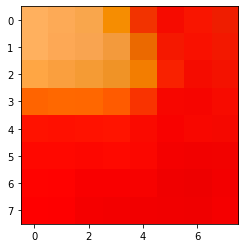

In [31]:
r, c = 25, 1320
patch = im1[r - 20 : r + 20, c - 20 : c + 20]
patch = skimage.transform.resize(patch, (8, 8))
patch = normalize(patch)
plt.imshow(patch)
patch.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(8, 8, 3)

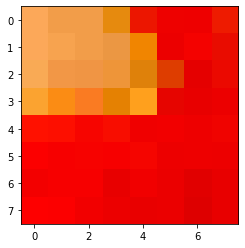

In [30]:
r, c = 25, 1320
patch = im1[r - 20 : r + 20, c - 20 : c + 20]
patch = patch[::5, ::5, :]
patch = normalize(patch)
plt.imshow(patch)
patch.shape

In [41]:
a = [1, 2, 3, 4]

In [42]:
a.remove(1z)

In [43]:
a

[2, 3, 4]